c:\Users\Track Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 30, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,951 (34.96 KB)

 Trainable params: 8,951 (34.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.1315 - val_loss: 0.0434
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0166 - val_loss: 0.0069
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0074 - val_loss: 0.0052
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0052 - val_loss: 0.0042
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - val_loss: 0.0041
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


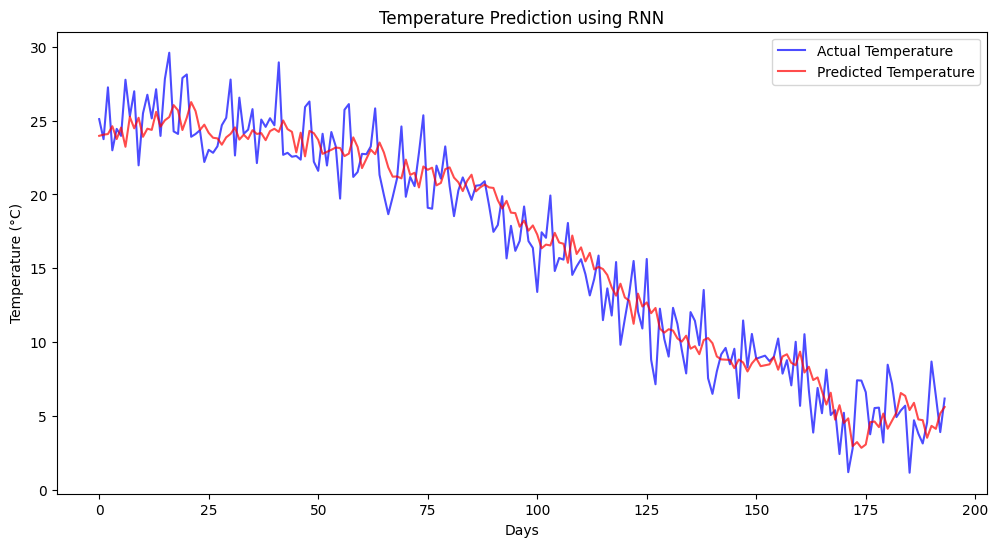

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
# Generate synthetic temperature data
np.random.seed(42)
days = 1000
dates = pd.date_range(start='2020-01-01', periods=days, freq='D')
# Create seasonal temperature pattern
temperatures = 15 + 10 * np.sin(2 * np.pi * np.arange(days) / 365) + np.random.randn(days) * 2
weather_data = pd.DataFrame({'Temperature': temperatures}, index=dates)
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(weather_data)
# Create sequences
sequence_length = 30
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])
X, y = np.array(X), np.array(y)
# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Build RNN model
model = keras.Sequential([
    keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(sequence_length, 1)),
    keras.layers.SimpleRNN(50, return_sequences=False),
    keras.layers.Dense(25),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Temperature', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicted Temperature', color='red', alpha=0.7)
plt.title('Temperature Prediction using RNN')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()